In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
SEED = int(time.time())

import sys
sys.path.append('..')

from os.path import join
from datetime import datetime

DATAFOLDER = join('..', 'data')

from src.transforms import *

# Load data

In [42]:
data.start_time[0] > 2008

TypeError: '>' not supported between instances of 'str' and 'int'

In [2]:
data = pd.read_csv(join(DATAFOLDER, 'matches-Brazil-2004-2017.csv'))
data.head()

,league,area,retrieved_from_url,start_time,end_time,team1,team2,team1_score,team2_score,outcome,team1_odds,team2_odds,draw_odds,year
0,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-21 22:00:00,2004-04-21 23:30:00,Sao Caetano,Vitoria,1.0,0.0,TEAM1,1.5,6.17,3.48,2004
1,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-21 22:00:00,2004-04-21 23:30:00,Figueirense,Internacional,1.0,0.0,TEAM1,2.1,3.15,3.17,2004
2,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-21 22:00:00,2004-04-21 23:30:00,Botafogo RJ,Goias,1.0,4.0,TEAM2,1.9,3.64,3.2,2004
3,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-22 00:00:00,2004-04-22 01:30:00,Palmeiras,Atletico-MG,0.0,0.0,DRAW,1.95,3.6,3.25,2004
4,Serie A,Brazil,https://www.oddsportal.com/soccer/brazil/serie...,2004-04-22 00:00:00,2004-04-22 01:30:00,Cruzeiro,Juventude,2.0,1.0,TEAM1,1.33,-,4.18,2004


# Generate features

## Categorical to numerical features

### 1-hot Enconding

In [3]:
from sklearn.preprocessing import OneHotEncoder

feat_enc = OneHotEncoder(handle_unknown='ignore')

In [4]:
teams1 = data['team1'].unique()
teams2 = data['team2'].unique()
all_teams = np.append(teams1, teams2)
all_teams = np.unique(all_teams)
all_teams.shape

(44,)

In [5]:
feat_enc.fit(all_teams.reshape(-1,1))

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [6]:
features_categorical_1hot_team1 = feat_enc.transform(data['team1'].values.reshape(-1,1)).toarray()
features_categorical_1hot_team2 = feat_enc.transform(data['team2'].values.reshape(-1,1)).toarray()
features_categorical_1hot_team1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

### Label enconding

In [7]:
from sklearn.preprocessing import LabelEncoder

feat_le = LabelEncoder()

In [8]:
feat_le.fit(all_teams)

LabelEncoder()

In [9]:
features_categorical_label_team1 = feat_le.transform(data['team1'].values).reshape(-1,1)
features_categorical_label_team2 = feat_le.transform(data['team2'].values).reshape(-1,1)
features_categorical_label_team1

array([[38],
       [18],
       [ 9],
       ...,
       [42],
       [12],
       [41]])

In [10]:
feat_le.transform(all_teams)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

## Numerical features

In [11]:
from sklearn.preprocessing import StandardScaler

tf_std = StandardScaler()

In [12]:
def odd2float(s):
    try:
        return float(s)
    except:
        return 0

In [13]:
features_numerical_odds_team1 = data['team1_odds'].apply(odd2float).values.reshape(-1,1)
features_numerical_odds_team2 = data['team2_odds'].apply(odd2float).values.reshape(-1,1)
features_numerical_odds_draw = data['draw_odds'].apply(odd2float).values.reshape(-1,1)

# Create Label

In [14]:
y = data['outcome']

In [15]:
outcome_binary = data['outcome'].copy()
outcome_binary.loc[data['outcome'] != 'DRAW'] = 'NOT DRAW'
y_binary = outcome_binary

# Agregate features

In [16]:
features_categorical_1hot_team1.shape

(5582, 44)

In [17]:
X_1hot = np.concatenate((features_categorical_1hot_team1, features_categorical_1hot_team2, 
                features_numerical_odds_team1, features_numerical_odds_team2, features_numerical_odds_draw), 
                axis=1)

In [18]:
X_1hot_transformed = StandardScaler().fit_transform(X_1hot)

In [19]:
X_label = np.concatenate((features_categorical_label_team1, features_categorical_label_team2, 
                        features_numerical_odds_team1, features_numerical_odds_team2, features_numerical_odds_draw), 
                        axis=1)

X_label_transformed = StandardScaler().fit_transform(X_label)

In [20]:
X_label_transformed

array([[ 1.31336023,  1.63868343, -0.92180426,  1.09969399,  0.01243225],
       [-0.33132329,  0.3240391 ,  0.09952907, -0.59355779, -0.71166762],
       [-1.07143088, -0.00462198, -0.24091537, -0.31882489, -0.64159344],
       ...,
       [ 1.64229693, -0.25111779,  0.20166241, -0.54309665,  0.01243225],
       [-0.82472835, -0.57977888,  0.13357352, -0.49824229, -0.15107417],
       [ 1.56006276,  0.899196  , -1.21118204,  2.84340693,  3.18912842]])

# Pipeline for Data Preprocessing

In [22]:
from sklearn.pipeline import Pipeline, FeatureUnion

num_attribs = ['team1_odds', 'team2_odds', 'draw_odds']
cat_attribs = ['team1', 'team2']

num_pipeline = Pipeline(
    [
        ('selector', DataFrameSelector(attribute_names=num_attribs)),
        ('odds2float', GetOdds()),
        ('std_scaller', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    [
        ('selector', DataFrameSelector(attribute_names=cat_attribs)),
        ('encoder', TeamNameEncoder()),
        ('std_scaller', StandardScaler())
    ]
)

full_pipeline = FeatureUnion(
    transformer_list=[
        ('num_pipeline', num_pipeline),
        ('cat_pipeline', cat_pipeline)
    ]
)

In [23]:
full_pipeline.fit(data)
X = full_pipeline.transform(data)

Get labels

In [24]:
y = data['outcome'].values
y_binary = y.copy()
y_binary[y_binary != 'DRAW'] = 'NOT DRAW'

In [25]:
data_2_plot = pd.DataFrame(data=np.concatenate((X, y.reshape(-1,1)), axis=1), 
                           columns=['team1_odd', 'team2_odd', 'draw_odd', 'team1_idx', 'team2_idx', 'Class'])

In [26]:
data_2_plot.head()

,team1_odd,team2_odd,draw_odd,team1_idx,team2_idx,Class
0,-0.921804,1.09969,0.0124322,1.31336,1.63868,TEAM1
1,0.0995291,-0.593558,-0.711668,-0.331323,0.324039,TEAM1
2,-0.240915,-0.318825,-0.641593,-1.07143,-0.00462198,TEAM2
3,-0.155804,-0.341252,-0.524803,0.655487,-1.4836,DRAW
4,-1.21118,-2.3597,1.6475,-0.413557,0.48837,TEAM1


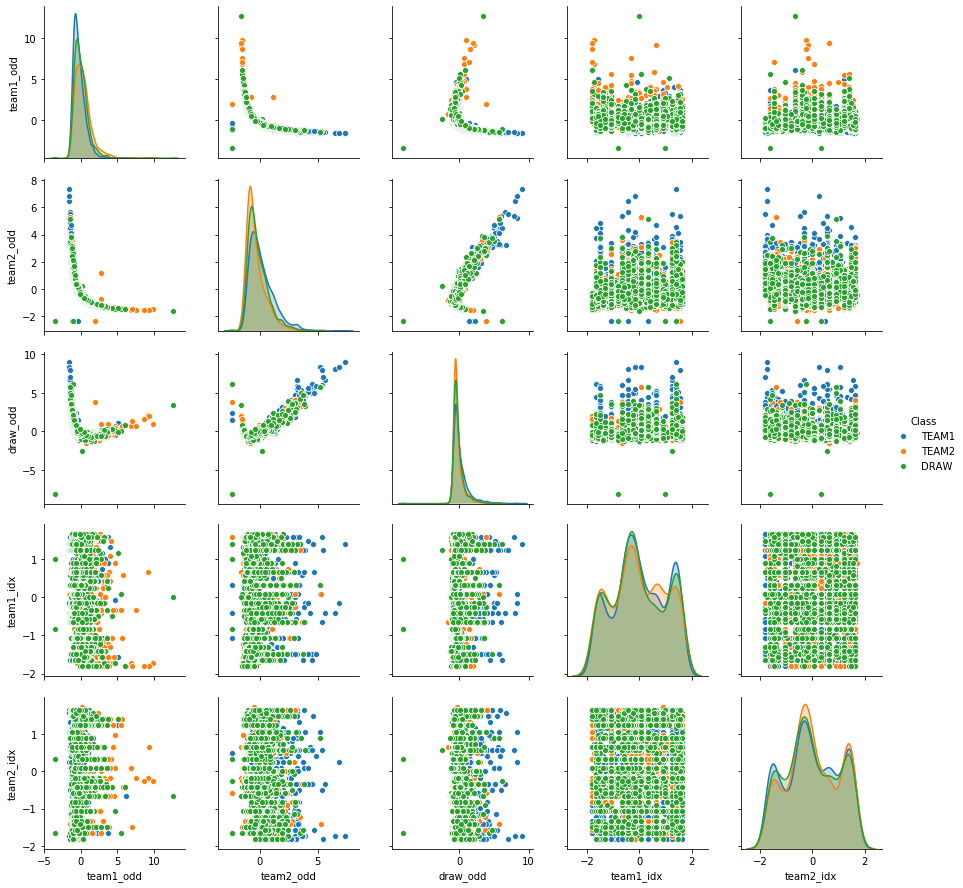

In [27]:
sns.pairplot(data_2_plot, hue="Class")

In [28]:
data_2_plot.groupby('Class').Class.value_counts()

Class  Class
DRAW   DRAW     1454
TEAM1  TEAM1    2810
TEAM2  TEAM2    1318
Name: Class, dtype: int64

# Let us test some classifier to see how it goes

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf_mlp = MLPClassifier(max_iter=2000, hidden_layer_sizes=(100,50,25))
clf_mlp.fit(X, y_binary)

clf_svc = SVC()
clf_svc.fit(X, y_binary)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
y_hat = clf_mlp.predict(X)
y_hat_svc = clf_svc.predict(X)

In [31]:
confusion_matrix(y_true=y_binary, y_pred=y_hat)

array([[ 456,  998],
       [ 227, 3901]])

In [32]:
confusion_matrix(y_true=y_binary, y_pred=y_hat_svc)

array([[   4, 1450],
       [   0, 4128]])

In [33]:
print(classification_report(y_true=y_binary, y_pred=y_hat))

              precision    recall  f1-score   support

        DRAW       0.67      0.31      0.43      1454
    NOT DRAW       0.80      0.95      0.86      4128

    accuracy                           0.78      5582
   macro avg       0.73      0.63      0.65      5582
weighted avg       0.76      0.78      0.75      5582



In [34]:
print(classification_report(y_true=y_binary, y_pred=y_hat_svc))

              precision    recall  f1-score   support

        DRAW       1.00      0.00      0.01      1454
    NOT DRAW       0.74      1.00      0.85      4128

    accuracy                           0.74      5582
   macro avg       0.87      0.50      0.43      5582
weighted avg       0.81      0.74      0.63      5582



In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf_bayes = GaussianNB()

In [ ]:
cross_val_score(clf_bayes, X_1hot, y, cv=10)

In [ ]:
cross_val_score(clf_bayes, X_1hot_transformed, y, cv=10)

In [ ]:
cross_val_score(clf_bayes, X_label, y, cv=10)

In [ ]:
cross_val_score(clf_bayes, X_label_transformed, y, cv=10)

Make it binary

In [ ]:
cross_val_score(clf_bayes, X_label_transformed, y_binary, cv=10)

In [ ]:
X_label[0,:]

In [ ]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(max_iter=2000)

In [ ]:
cross_val_score(clf_mlp, X_label_transformed, y, cv=10)

In [ ]:
cross_val_score(clf_mlp, X_1hot, y, cv=10)